In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
from torchvision import transforms
import random
import argparse

In [8]:
opt = argparse.Namespace(
    preprocess='resize_crop',
    load_size=320,
    crop_size=320,
    rotate_perspective=True,
    no_flip=False
)

In [4]:
from data.base_dataset import *
from data.aligned_dataset import *

In [6]:
def fix_transform(transforms,img,seed):
    random.seed(seed)
    torch.manual_seed(seed)

    out = transforms(img)

    return out

In [20]:
AB = Image.open('/Users/sewoong/Desktop/ML:DL/pix2pix/pairdata/37.jpg').convert('RGB')
# split AB image into A and B
w, h = AB.size
w2 = int(w / 2)
A = AB.crop((0, 0, w2, h))
B = AB.crop((w2, 0, w, h))


In [79]:
index=np.random.randint(0,1000)

transform_params = get_params(opt, A.size)
A_transform = get_transform(opt, transform_params, grayscale=True, original=True, seed=index)
B_transform = get_transform(opt, transform_params, grayscale=True, original=False, seed=index)
A_fix = fix_transform(A_transform,A,index)
B_fix = fix_transform(B_transform,B,index)

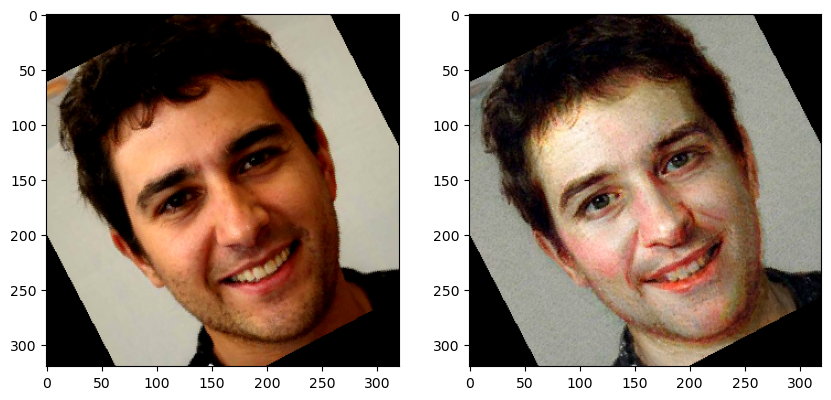

In [80]:
A_fix = A_fix*0.5+0.5
B_fix = B_fix*0.5+0.5

A_fix = A_fix.permute(1,2,0)
B_fix = B_fix.permute(1,2,0)

fig,axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(A_fix)
axes[1].imshow(B_fix)